## Data Pre-Processing

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
from sklearn.preprocessing import OneHotEncoder

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.tsv to data.tsv


In [41]:
#read the data
df = pd.read_csv('data.tsv', sep='\t')

In [42]:
#check its size
df.shape

(27682, 18)

In [43]:
#have a look at some rows sample
df.sample(10)

,Timestamp,How old are you?,Industry,Job title,Additional context on job title,Annual salary,Other monetary comp,Currency,Currency - other,Additional context on income,Country,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
13289,4/28/2021 12:21:35,25-34,Law,Associate Attorney,NaN,"61,800",23750.0,USD,NaN,NaN,United States,Indiana,Mishawaka,5-7 years,5-7 years,"Professional degree (MD, JD, etc.)",Woman,White
4856,4/27/2021 12:49:33,25-34,Nonprofits,Workshop Coordinator,"I coordinate pro se workshops (that is, worksh...","50,000",0.0,USD,NaN,NaN,United States,Georgia,Atlanta,8 - 10 years,5-7 years,Master's degree,Woman,"Asian or Asian American, White"
17150,4/28/2021 19:31:54,18-24,Retail,Cashier,NaN,"20,000",0.0,USD,NaN,NaN,Usa,Maryland,Edgewood,1 year or less,1 year or less,High School,Woman,Black or African American
16198,4/28/2021 17:37:26,25-34,Law,Librarian,NaN,"66,000",1000.0,USD,NaN,NaN,USA,Virginia,Richmond,8 - 10 years,5-7 years,Master's degree,Woman,White
3111,4/27/2021 11:59:11,25-34,Art & Design,Senior Graphic Designer,Basically art director,"47,999",0.0,USD,NaN,NaN,U.S.,Colorado,Denver,5-7 years,5-7 years,College degree,Woman,White
13168,4/28/2021 12:09:57,35-44,Media & Digital,photo editor,NaN,"58,500",0.0,USD,NaN,NaN,US,New York,New York,11 - 20 years,11 - 20 years,College degree,Woman,White
5769,4/27/2021 13:23:01,35-44,Art & Design,Project Architect,NaN,"85,000",4000.0,USD,NaN,NaN,United States,Colorado,Denver,11 - 20 years,11 - 20 years,Master's degree,Woman,White
8347,4/27/2021 15:55:17,25-34,Nonprofits,Director of Digital Strategies,NaN,"92,000",NaN,USD,NaN,NaN,United States of America,Indiana,Indianapolis,11 - 20 years,8 - 10 years,Master's degree,Woman,White
7521,4/27/2021 14:54:13,25-34,"Accounting, Banking & Finance",Sr. Compliance Analyst,NaN,"72,800",6000.0,USD,NaN,NaN,USA,California,San Diego,5-7 years,2 - 4 years,College degree,Woman,Black or African American
24594,5/5/2021 16:46:55,35-44,Law,Attorney,NaN,332000,NaN,USD,NaN,"I am a 1099 contractor; I make $160/hour, pre-...",U.S.,Illinois,Chicago,11 - 20 years,8 - 10 years,"Professional degree (MD, JD, etc.)",Woman,White


In [44]:
#Let's drop useless columns (which are not included as inputs in the prediction task)
df.drop(['Timestamp', 'Highest level of education completed',
         'Industry','State','City','Race',
         'Additional context on job title',
         'Additional context on income',
         'Currency - other'], axis=1, inplace=True)

In [45]:
# check type of data
df.dtypes

How old are you?                             object
Job title                                    object
Annual salary                                object
Other monetary comp                         float64
Currency                                     object
Country                                      object
Overall years of professional experience     object
Years of experience in field                 object
Gender                                       object
dtype: object

In [46]:
#Let's convert the salary to float
df['Annual salary'] = df['Annual salary'].apply(lambda x : x.replace(",", "", 2))
df['Annual salary'] = df['Annual salary'].astype(float)

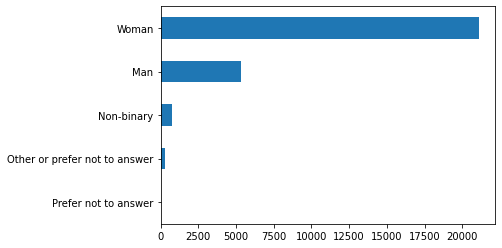

In [47]:
# Let's look at the share of gender
df['Gender'].value_counts().sort_values().plot(kind = 'barh')

In [48]:
df['Gender'].value_counts()

Woman                            21142
Man                               5353
Non-binary                         738
Other or prefer not to answer      284
Prefer not to answer                 1
Name: Gender, dtype: int64

In [49]:
#Let's drop this exception row 
df = df[df.Gender != 'Prefer not to answer']

In [50]:
# Get one hot encoding of column Gender
one_hot = pd.get_dummies(df['Gender'])

# Drop column Gender as it is now encoded
df = df.drop('Gender',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df.sample(10)  

,How old are you?,Job title,Annual salary,Other monetary comp,Currency,Country,Overall years of professional experience,Years of experience in field,Man,Non-binary,Other or prefer not to answer,Woman
2310,25-34,Patent agent,150000.0,15000.0,USD,United States,2 - 4 years,2 - 4 years,0,0,0,1
21000,25-34,Product Manager,62320.0,2500.0,USD,USA,5-7 years,2 - 4 years,0,0,0,1
17927,25-34,"Senior Manager, Volunteer Engagement LMM a",73000.0,1500.0,USD,United States,8 - 10 years,8 - 10 years,0,0,0,1
17439,25-34,Director of Leadership and Talent Development ...,85000.0,8500.0,USD,United States of America,8 - 10 years,8 - 10 years,0,0,0,1
3354,35-44,Sales Operations Manager,102000.0,NaN,USD,USA,8 - 10 years,5-7 years,0,0,0,1
16002,35-44,Unit Head,69613.0,0.0,GBP,UK,21 - 30 years,11 - 20 years,0,0,0,1
12705,25-34,Communications specialist,81000.0,0.0,USD,US,11 - 20 years,5-7 years,0,0,0,1
26805,25-34,Architect,85000.0,5000.0,USD,USA,2 - 4 years,11 - 20 years,0,0,0,1
9747,25-34,Graphic Designer,42000.0,NaN,USD,United States,5-7 years,5-7 years,0,0,0,1
15529,45-54,Senior Mechanical Engineer,155202.0,0.0,USD,United States,21 - 30 years,21 - 30 years,1,0,0,0


In [51]:
#Let's convert the age ranges to their median value, so that it can be exploited by ML models as a numerical feature
age_mapping = {'25-34':30,
               '35-44':40,
               '45-54':50,
               '18-24':21,
               '55-64':60,
               '65 or over':65,
               'under 18':18}

df['age']  = df['How old are you?'].map(age_mapping)

In [52]:
df['age'].value_counts(dropna=False)

30    12482
40     9807
50     3152
21     1159
60      981
65       89
18       11
Name: age, dtype: int64

In [53]:
df['Years of experience in field'].value_counts()

11 - 20 years       6483
5-7 years           6446
2 - 4 years         6146
8 - 10 years        4919
21 - 30 years       1856
1 year or less      1417
31 - 40 years        376
41 years or more      38
Name: Years of experience in field, dtype: int64

In [54]:
df['Overall years of professional experience'].value_counts()

11 - 20 years       9537
8 - 10 years        5315
5-7 years           4815
21 - 30 years       3596
2 - 4 years         2949
31 - 40 years        857
1 year or less       493
41 years or more     119
Name: Overall years of professional experience, dtype: int64

In [55]:
#Let's do the same with the number of years of experience...
exp_mapping = {'11 - 20 years':15,
               '8 - 10 years':9,
               '5-7 years':6,
               '21 - 30 years':25,
               '2 - 4 years':3,
               '31 - 40 years':35,
               '1 year or less':0,
               '41 years or more': 45}

df['avg_years_exp']  = df['Overall years of professional experience'].map(exp_mapping)
df['avg_years_exp_in_field']  = df['Years of experience in field'].map(exp_mapping)

In [56]:
df['avg_years_exp'].value_counts()

15    9537
9     5315
6     4815
25    3596
3     2949
35     857
0      493
45     119
Name: avg_years_exp, dtype: int64

In [57]:
df['avg_years_exp_in_field'].value_counts()

15    6483
6     6446
3     6146
9     4919
25    1856
0     1417
35     376
45      38
Name: avg_years_exp_in_field, dtype: int64

In [58]:
# country names are messy... let's first consolidate the namings of the main countries
country_mapping = {'UNITED STATES':'US',
                   'UNITED STATES ':'US',
                   'U.S.A.':'US',
                   'USA':'US',
                   'USA ':'US',
                   'U.S.':'US',
                   'U.S':'US',
                   'UNITED STATES OF AMERICA':'US',
                   'UNITED STATES OF AMERICA ':'US',
                   'UNITED KINGDOM':'UK',
                   'ENGLAND':'UK',
                   'U.K.':'UK',
                   'U.K':'UK',
                   'UK ':'UK',
                   'SCOTLAND':'UK',
                   'SCOTLAND ':'UK',
                   'THE NETHERLANDS':'NETHERLANDS'
                  }
df['Country'] = df['Country'].apply(lambda x : country_mapping[x.upper()] if x.upper() in country_mapping else x.upper())


In [59]:
# Let's us keep only the name of the top 20 countries and label the remaining as "other"
top_20_countries = df['Country'].value_counts().to_frame().head(20).index
df['Country'] = df['Country'].apply(lambda x : x if x in top_20_countries else 'other')

In [60]:
# Get one hot encoding of column Country
one_hot = pd.get_dummies(df['Country'])

# Drop column Country as it is now encoded
df = df.drop('Country',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df.sample(10)  

,How old are you?,Job title,Annual salary,Other monetary comp,Currency,Overall years of professional experience,Years of experience in field,Man,Non-binary,Other or prefer not to answer,...,NETHERLANDS,NEW ZEALAND,SPAIN,SWEDEN,SWITZERLAND,UK,UNITED KINGDOM,US,US,other
23050,25-34,Sr. Quality Systems Document Specialist,86000.0,8000.0,USD,5-7 years,5-7 years,0,1,0,...,0,0,0,0,0,0,0,1,0,0
20614,45-54,HR Generalist,55000.0,5000.0,USD,11 - 20 years,5-7 years,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15413,25-34,Procurement Manager,52200.0,13000.0,GBP,5-7 years,5-7 years,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24027,25-34,Professional Development Specialist,105000.0,NaN,USD,11 - 20 years,8 - 10 years,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10940,45-54,Managing editor,85000.0,4000.0,USD,21 - 30 years,11 - 20 years,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23875,35-44,Operations Analyst,52500.0,8000.0,USD,11 - 20 years,5-7 years,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21734,45-54,Administrative Assistant,37400.0,4000.0,USD,21 - 30 years,8 - 10 years,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21179,45-54,Chief Deputy Director,187000.0,0.0,USD,21 - 30 years,21 - 30 years,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21342,25-34,Project Manager,170000.0,20000.0,USD,2 - 4 years,2 - 4 years,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26398,35-44,"Assistant Director, Human Resources",96900.0,0.0,USD,11 - 20 years,5-7 years,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
df['Currency'].value_counts()

USD        23076
CAD         1652
GBP         1572
EUR          626
AUD/NZD      496
Other        145
CHF           37
SEK           37
JPY           23
ZAR           13
HKD            4
Name: Currency, dtype: int64

In [62]:
#let's also convert the currency, so that we can have a comparable salary quantity
def currency_converter(currency):
    if currency == 'USD':
        return 1
    if currency == 'CAD':
        return 0.8
    if currency == 'GBP':
        return 1.32
    if currency == 'EUR':
        return 1.1
    if currency == 'CHF':
        return 1.07
    if currency == 'SEK':
        return 0.11
    if currency == 'JPY':
        return 0.0083
    if currency == 'ZAR':
        return 0.068
    if currency == 'HKD':
        return 0.13
    if currency == 'AUD/NZD':
        return 0.75
    if currency == 'Other':
        return 1

df.rename(columns={'Annual salary':'annual_salary'}, inplace=True)
df['annual_salary'] = df.apply(lambda x : x.annual_salary*currency_converter(x.Currency),axis=1)

In [63]:
df.columns

Index(['How old are you?', 'Job title', 'annual_salary', 'Other monetary comp',
       'Currency', 'Overall years of professional experience',
       'Years of experience in field', 'Man', 'Non-binary',
       'Other or prefer not to answer', 'Woman', 'age', 'avg_years_exp',
       'avg_years_exp_in_field', 'AMERICA', 'AUSTRALIA', 'AUSTRALIA ',
       'BELGIUM', 'CANADA', 'CANADA ', 'ENGLAND ', 'FRANCE', 'GERMANY',
       'IRELAND', 'JAPAN', 'NETHERLANDS', 'NEW ZEALAND', 'SPAIN', 'SWEDEN',
       'SWITZERLAND', 'UK', 'UNITED KINGDOM ', 'US', 'US ', 'other'],
      dtype='object')

In [64]:
df_saved = df

## 1- ML modeling without Job Title

In [65]:
# Let's drop useless columns (Inlcuding the Job Title)
df = df_saved
df = df.drop(columns = ['How old are you?',
                   'Job title',
                   'Currency',
                   'Overall years of professional experience',
                   'Years of experience in field',
                   'Other monetary comp'])

In [66]:
df.sample(10)

,annual_salary,Man,Non-binary,Other or prefer not to answer,Woman,age,avg_years_exp,avg_years_exp_in_field,AMERICA,AUSTRALIA,...,NETHERLANDS,NEW ZEALAND,SPAIN,SWEDEN,SWITZERLAND,UK,UNITED KINGDOM,US,US,other
7008,43850.0,0,0,0,1,40,15,3,0,0,...,0,0,0,0,0,0,0,1,0,0
9897,165000.0,1,0,0,0,40,15,6,0,0,...,0,0,0,0,0,0,0,1,0,0
16244,49500.0,1,0,0,0,40,6,6,0,0,...,0,0,0,0,0,1,0,0,0,0
23729,65000.0,1,0,0,0,50,25,15,0,0,...,0,0,0,0,0,0,0,1,0,0
9972,300000.0,0,0,0,1,40,15,15,0,0,...,0,0,0,0,0,0,0,1,0,0
17788,235000.0,1,0,0,0,30,9,9,0,0,...,0,0,0,0,0,0,0,1,0,0
17282,34980.0,0,0,0,1,30,9,3,0,0,...,0,0,0,0,0,1,0,0,0,0
21456,53000.0,0,0,0,1,30,6,6,0,0,...,0,0,0,0,0,0,0,1,0,0
7669,76500.0,0,0,0,1,40,15,15,0,0,...,0,0,0,0,0,0,0,1,0,0
25940,116000.0,0,0,0,1,30,6,3,0,0,...,0,0,0,0,0,0,0,1,0,0


In [67]:
df.columns

Index(['annual_salary', 'Man', 'Non-binary', 'Other or prefer not to answer',
       'Woman', 'age', 'avg_years_exp', 'avg_years_exp_in_field', 'AMERICA',
       'AUSTRALIA', 'AUSTRALIA ', 'BELGIUM', 'CANADA', 'CANADA ', 'ENGLAND ',
       'FRANCE', 'GERMANY', 'IRELAND', 'JAPAN', 'NETHERLANDS', 'NEW ZEALAND',
       'SPAIN', 'SWEDEN', 'SWITZERLAND', 'UK', 'UNITED KINGDOM ', 'US', 'US ',
       'other'],
      dtype='object')

In [68]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [69]:
x = df[['Man', 'Non-binary', 'Other or prefer not to answer',
       'Woman', 'age', 'avg_years_exp', 'avg_years_exp_in_field', 'AUSTRALIA',
       'AUSTRALIA ', 'BELGIUM', 'CANADA', 'CANADA ', 'ENGLAND ', 'FRANCE',
       'GERMANY', 'IRELAND', 'JAPAN', 'NETHERLANDS', 'NEW ZEALAND', 'SPAIN',
       'SWEDEN', 'SWITZERLAND', 'UK', 'UNITED KINGDOM ', 'US',
       'other']]
y = df['annual_salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 28)

In [70]:
# Initializing the Random Forest Regression model with 100 decision trees
model = GradientBoostingRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train)

# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  9124014.942


## 2- ML Model with Job Title

In [85]:
df = df_saved
df = df.drop(columns = ['How old are you?',
                   'Currency',
                   'Overall years of professional experience',
                   'Years of experience in field',
                   'Other monetary comp'])

In [96]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re
import nltk
import gensim
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
nltk.download('stopwords')
nltk.download('brown')
nltk.download('word2vec_sample')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package word2vec_sample to /root/nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [87]:
df['Job title'].value_counts().to_frame().sample(10)

,Job title
Principal Software Engineer,30
Director of Communications and Government Affairs,1
Literary agent,1
Dispatcher,1
assembly worker,1
Executive Director of Admission,1
Senior Librarian 1A,1
1st Grade Teacher,1
Machinist/Roll Grinder,1
Head of People,1


In [88]:
import gensim
from nltk.corpus import brown
model = gensim.models.Word2Vec(brown.sents())
model.save('brown.embedding')
new_model = gensim.models.Word2Vec.load('brown.embedding')

In [89]:
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [90]:
import re
import string
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import gensim.downloader as api


class TextNormalizer:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.punctuation_table = str.maketrans('','',string.punctuation)
        self.stop_words = set(stopwords.words('english'))

    def normalize_text(self,text):
        normalized_sentences = []
        text = re.sub(' +',' ', text)
        text = text.lower()
        sentences = sent_tokenize(text)
        for sentence in sentences:
            #remove punctuation
            sentence = sentence.translate(self.punctuation_table)
            #strip leading/trailing whitespace
            sentence = sentence.strip()
            words = word_tokenize(sentence)
            #lemmatize and remove stopwords
            filtered = [self.lemmatizer.lemmatize(word) for word in words if word not in self.stop_words]
            new_sentence = ' '.join(filtered)
            normalized_sentences.append(new_sentence)
        return normalized_sentences

In [91]:
def average_embedding(model,normalized_text):
    if len(normalized_text) == 0:
        return np.nan
    avg = np.zeros(300)
    splitted = normalized_text.split(' ')
    for word in splitted:
        if word in model:
            avg += model[word]
    return avg/len(normalized_text)

In [92]:
textNormalizer = TextNormalizer()

In [97]:
textNormalizer.normalize_text('Executive Director')

['executive director']

In [98]:
df['Job title'] = df['Job title'].apply(lambda x : textNormalizer.normalize_text(x))
df['Job title'] = df['Job title'].apply(lambda x : average_embedding(model, x[0]) )
df = df[~df['Job title'].isnull()]

In [99]:
df['Job title'].sample(10)

9777     [0.0008340041385963559, -5.548833481346568e-05...
4719     [-0.0021996000095417627, 0.0017964473778479977...
5158     [-0.002620449127710384, -0.0012993521016577015...
1000     [-0.005942128465643951, -0.0059023358459983554...
23418    [0.00022679598381121954, -0.001408679177984595...
6918     [-0.0022332516889418323, -0.00068913544377973,...
9744     [-0.0011517875245772302, -0.007943325210362673...
26009    [-0.00021276378137027394, 0.000267779390359747...
16935    [-0.00158208574035338, -0.0008384345897606441,...
8631     [-0.0030807209642309892, -0.001159852664721639...
Name: Job title, dtype: object

In [100]:
emb_list = ['emb'+str(i) for i in range(300)]
df[emb_list] = pd.DataFrame(df['Job title'].tolist(), index= df.index)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [101]:
df.sample(10)

,Job title,annual_salary,Man,Non-binary,Other or prefer not to answer,Woman,age,avg_years_exp,avg_years_exp_in_field,AMERICA,...,emb290,emb291,emb292,emb293,emb294,emb295,emb296,emb297,emb298,emb299
21064,"[-0.008361956902912684, -0.0031481715185301645...",58500.0,0,0,0,1,30,9,9,0,...,0.007366,0.018416,0.007765,0.004330,-0.000380,-0.004505,0.012941,-0.001680,0.009855,-0.003024
25369,"[-0.002295898480547799, -0.0012156406279515337...",53500.0,0,0,0,1,30,15,6,0,...,-0.008081,0.003600,-0.001450,-0.001010,0.000172,-0.004187,0.005086,-0.002353,0.005692,0.005105
10399,"[0.0031755100935697556, -0.001877019926905632,...",75000.0,0,0,0,1,40,15,9,0,...,0.004243,-0.004243,0.002443,-0.000037,0.008845,-0.004834,0.002931,0.002726,0.004885,-0.000636
5847,"[-0.016693469882011414, 0.0008834699168801307,...",63000.0,0,0,0,1,40,15,9,0,...,0.008733,0.017948,0.001077,0.010966,-0.013229,-0.015670,-0.007593,-0.003341,0.006784,0.001683
14392,"[4.198585104729448e-06, -0.004428039171866008,...",100000.0,0,0,0,1,30,3,3,0,...,-0.004605,0.006746,-0.001437,0.003768,-0.000818,0.001611,0.006442,0.002822,0.002511,0.003124
17078,"[-0.008002782690113988, -0.0036991034345380193...",124000.0,1,0,0,0,40,15,15,0,...,-0.000711,0.004825,-0.002350,-0.000980,-0.001531,-0.001155,0.008176,0.000800,0.000634,0.000613
5982,"[0.00290015008714464, -0.008812272300322851, -...",93500.0,0,0,0,1,40,15,15,0,...,-0.001705,0.003039,-0.003647,0.006651,0.003473,-0.006401,0.013782,0.001938,0.007778,0.008270
27105,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",87000.0,1,0,0,0,30,15,15,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6332,"[0.0034421080350875853, -0.005560659989714623,...",67000.0,0,0,0,1,40,15,15,0,...,-0.000735,0.001431,-0.001428,0.003589,-0.000864,-0.001301,0.000221,-0.000116,-0.008948,0.003457
25604,"[0.009930989891290664, -0.007311160117387772, ...",82198.0,0,0,0,1,30,6,6,0,...,-0.002132,-0.000971,-0.011698,-0.002940,-0.002452,-0.002940,-0.006671,-0.005026,-0.004295,-0.000394


In [102]:
x = df[['Man', 'Non-binary', 'Other or prefer not to answer',
       'Woman', 'age', 'avg_years_exp', 'avg_years_exp_in_field', 'AUSTRALIA',
       'AUSTRALIA ', 'BELGIUM', 'CANADA', 'CANADA ', 'ENGLAND ', 'FRANCE',
       'GERMANY', 'IRELAND', 'JAPAN', 'NETHERLANDS', 'NEW ZEALAND', 'SPAIN',
       'SWEDEN', 'SWITZERLAND', 'UK', 'UNITED KINGDOM ', 'US',
       'other'] + ['emb'+str(i) for i in range(300)] ]
y = df['annual_salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 28)

In [104]:
# Initializing the Random Forest Regression model with 100 decision trees
model = GradientBoostingRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train)

# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  2424772.241
